In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
import random
import os
import sys
import time
import numpy as np
import math
import zlib
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay

In [8]:
with open("E:\\Research\\Statue gen output\\NewEA_4_withDelaunayVolume.txt", 'r') as f:
    PARAMS = f.readlines()

In [9]:
from ast import literal_eval

In [10]:
PARAMS=literal_eval(PARAMS[0])

MemoryError: 

In [ ]:
PARAMS[0]

In [ ]:
len(PARAMS)

In [ ]:
GENERATIONS=300
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations\\New EA - 3"
POPULATION_SIZE=10

In [ ]:
def perimeter(vertices, edges):
    perimeter = 0
    for edge in edges:
        vertex1, vertex2 = edge
        x1, y1, z1 = vertices[vertex1]
        x2, y2, z2 = vertices[vertex2]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
        perimeter += distance
    return perimeter

In [9]:
def volume(vertices):
    vertices=np.array(vertices)
    tri = Delaunay(vertices)
    print(tri.simplices)
    tetra = vertices[tri.simplices]
    volumes = np.zeros(len(tetra))

    for i, t in enumerate(tetra):
        a, b, c, d = t
        v = (1.0/6.0) * np.abs(np.dot(b - a, np.cross(c - a, d - a)))
        volumes[i] = v

    total_volume = np.sum(volumes)
    
    return total_volume

In [11]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS+1):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    if (GEN_NUM-1)%50==0:
    
        for i in range(POPULATION_SIZE):

            VERTS=PARAMS[GEN_NUM-1][i][8][0]
            EDGES=PARAMS[GEN_NUM-1][i][8][1]

    #         entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
    #         entropy=entropy/8 

    #         cr=compression_ratio(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")

    #         gr=golden_ratio(VERTS,EDGES)

            v=volume(VERTS)
            p=perimeter(VERTS,EDGES)
    #         print(f"Volume: {v}")
    #         print(f"Perimeter: {p}")

            #fitness=volume+perimeter
            fitness=p/v
            FITNESS.append(round(fitness,6))

        ALL_FITNESS.append(FITNESS)

        BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
        print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')

    GEN_NUM+=1

Statue-3 has the best fitness value in 0 generation.
Statue-0 has the best fitness value in 50 generation.
Statue-0 has the best fitness value in 100 generation.
Statue-0 has the best fitness value in 150 generation.
Statue-0 has the best fitness value in 200 generation.
Statue-0 has the best fitness value in 250 generation.
Statue-0 has the best fitness value in 300 generation.
Wall time: 1.01 s


In [12]:
GENS=[0,50,100,150,200,250,300]

In [13]:
BEST_FITNESS

[3, 0, 0, 0, 0, 0, 0]

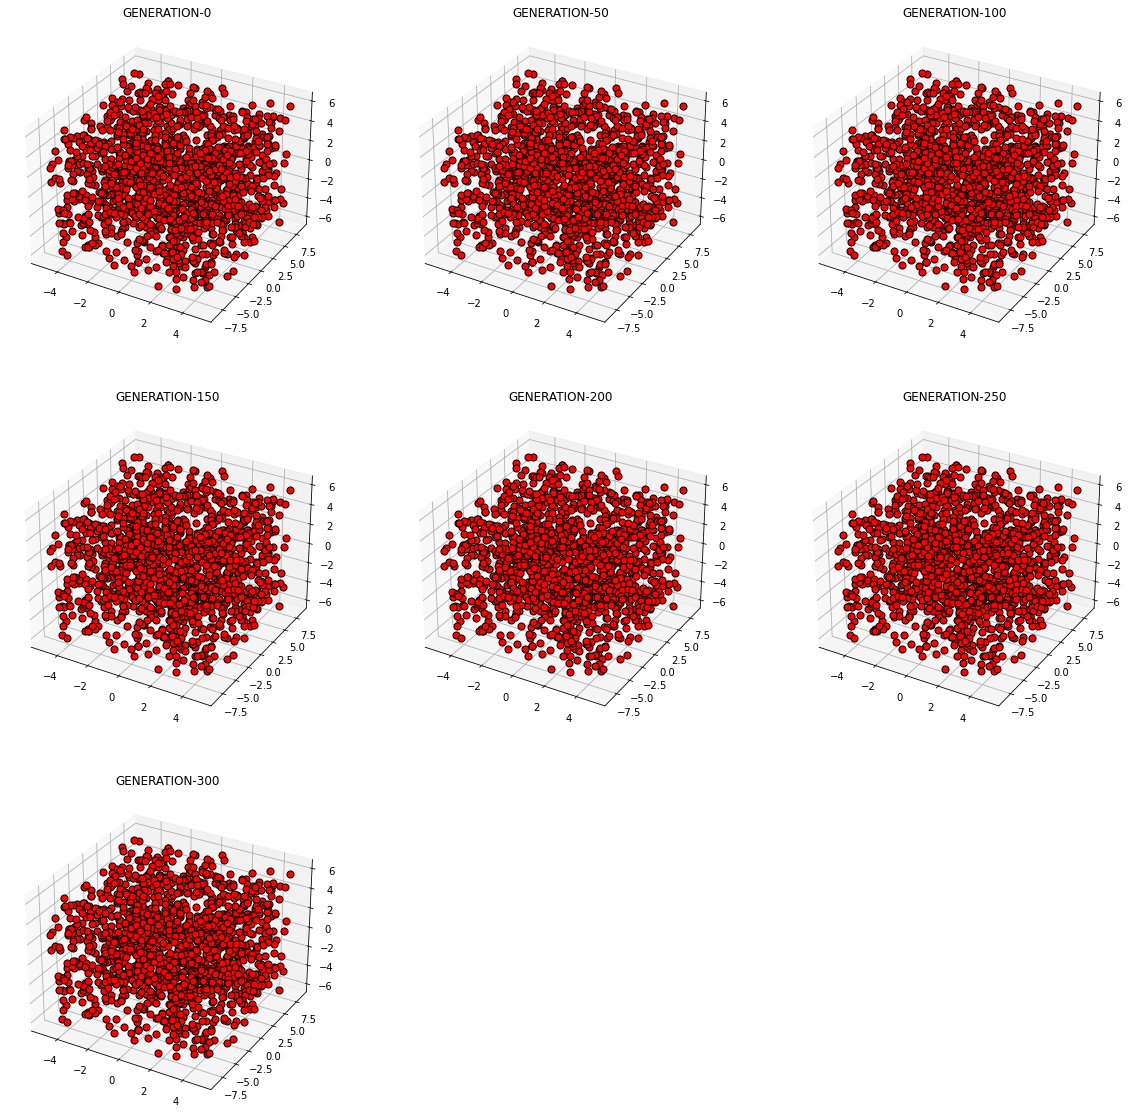

In [14]:
fig = plt.figure(figsize=(20,20))
for i,m in enumerate(BEST_FITNESS):
    model=PARAMS[GENS[i]][m][8][0]
    
    x=[m[0] for m in model]
    y=[m[1] for m in model]
    z=[m[2] for m in model]
    
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.scatter3D(x,y,z,color="red",depthshade=False,s=50,edgecolor="black")
    ax.title.set_text(f"GENERATION-{GENS[i]}")
    
plt.show()